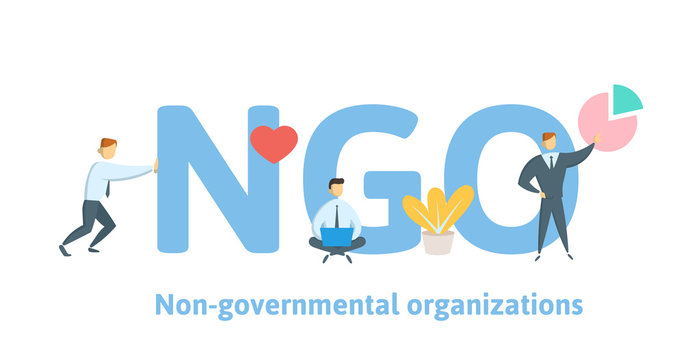

### ABOUT PROJECT

    HELP International, a global humanitarian NGO, has obtained $10 million in funding to address poverty and aid during crises.To optimize resource allocation, they aim to cluster nations based on social-economic conditions. This approach ensures targeted assistance to countries facing the most significant challenges, enhancing the positive impact of HELP International's efforts and promoting sustainable development in At-risk regions.

## OBJECTIVE

    The primary objective of this Python project on clustering countries is to categorize nations based on various key 
    factors and subsequently deliver a comprehensive solution to the organization. 

    Commencing with essential data inspection and tasks like cleaning the data studying variables and exploring 
    relationships between variables to ensure that the dataset is reliable and understandable.

    Conducting an in-depth out-lier analysis. Depending on their impact on our business objectives we will decide whether 
    to keep or remove these outliers.
    
    Performing an insightful analysis of the clusters to identify those countries in urgent need of aid. This analysis will
    involve comparing variables such, as gdpp, child_mort and income across clusters in order to distinguish between 
    developed and underdeveloped countries.

## IMPORTING LIBRARIES 

In [3]:
!pip install fastcluster
!pip install pyclustering



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached pyclustering-0.10.1.2-py3-none-any.whl



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import warnings

import fastcluster

%matplotlib inline

import numpy as np

import pandas as pd 

import seaborn as sns

import matplotlib.pyplot as plt

warnings.filterwarnings ( 'ignore' )

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA

from sklearn.datasets import make_blobs

from sklearn.metrics import silhouette_score

from sklearn.neighbors import NearestNeighbors

pd.set_option ( 'display.max_columns', None )

from sklearn.compose import ColumnTransformer

from pyclustering.cluster.kmeans import kmeans

from pyclustering.cluster.dbscan import dbscan

from scipy.cluster.hierarchy import linkage, dendrogram , cut_tree

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.preprocessing import StandardScaler , MinMaxScaler , Normalizer , LabelEncoder , OneHotEncoder

## IMPORTING DATA 

In [53]:
df = pd.read_csv("COUNTRIES.csv")
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


## STATISTICAL SUMMARY 

### DESCRIPTION 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### STATISTICAL SUMMARY 

In [55]:
df.describe ( )

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [56]:
df.describe(include = 'object')

,country
count,167
unique,167
top,Afghanistan
freq,1


## DATA VISUALIZATION

### COUNTRIES 

#### BIVARIATE AND MULTIVARIATE ANALYSIS 

##### COUNTRY WISE CHILD MORTALITY RATE ANALYSIS 

low_child_mortality_rates =
     country  child_mort
68  Iceland         2.6
High_child_mortality_rates =
    country  child_mort
66   Haiti       208.0


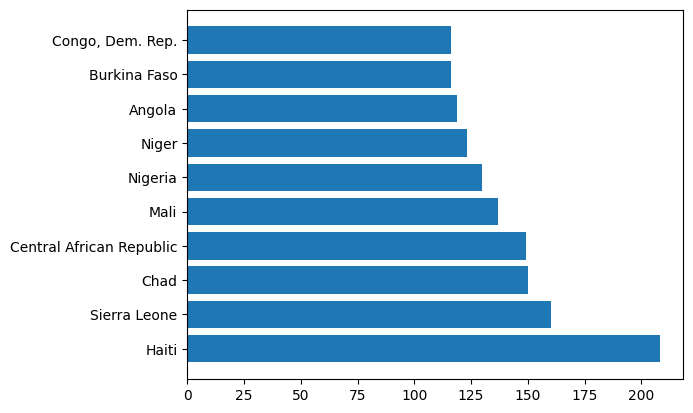

In [57]:
Country_Child_Mort = df.groupby('country')['child_mort'].mean().reset_index().sort_values('child_mort',ascending = False).head(10)
low_child_mortality_rates = df.groupby('country')['child_mort'].mean().reset_index().sort_values('child_mort',ascending = True).head(1)
High_child_mortality_rates = df.groupby('country')['child_mort'].mean().reset_index().sort_values('child_mort',ascending = False).head(1)

print('low_child_mortality_rates =\n', low_child_mortality_rates)
print('High_child_mortality_rates =\n',High_child_mortality_rates)
plt.barh(y = Country_Child_Mort.country , width = Country_Child_Mort.child_mort)
plt.show()

    -- INFERENCE --
    
        * The child mortality rates vary significantly among these nations, ranging from as low as 2.6 in Iceland to as
          high as 208.0 in Haiti.
          
        * Haiti has the highest child mortality rate: Haiti tops the list with a child mortality rate of 208.0. This high 
          rate can be attributed to various social-economic factors, including limited access to healthcare, clean water, 
          and nutrition.
          
        * Sierra Leone and Chad follow closely: Sierra Leone and Chad have the second and third highest child mortality 
          rates at 160.0 and 150.0, respectively. These countries face similar challenges as Haiti, such as inadequate 
          healthcare infrastructure and poverty.

        * Central African Republic, Mali, and Nigeria: These countries also exhibit relatively high child mortality rates,
          ranging from 130.0 to 149.0. Common factors contributing to child mortality in these nations include political 
          instability and limited access to quality healthcare.

        * Niger, Angola, and Burkina Faso: These countries have child mortality rates between 116.0 and 123.0. Although 
          still high, these rates are comparatively lower than the previous group. Challenges related to healthcare, 
          education, and economic development persist in these regions.

        * Congo, Dem. Rep., Guinea-Bissau, Benin, Cote d'Ivoire, and Equatorial Guinea: These countries have child 
          mortality rates around 111.0. While the rates are similar, variations may exist in the causes, such as disease 
          prevalence, malnutrition, and healthcare access.

#### EXPORTS OF EACH COUNTRY 

In [10]:
Country_exports = df.groupby('country')['exports'].mean().reset_index().sort_values('exports',ascending = False).head(10)
Country_exports

,country,exports
133,Singapore,200.0
91,Luxembourg,175.0
98,Malta,153.0
73,Ireland,103.0
131,Seychelles,93.8
95,Malaysia,86.9
49,Equatorial Guinea,85.8
38,"Congo, Rep.",85.1
67,Hungary,81.8
157,United Arab Emirates,77.7


<BarContainer object of 10 artists>

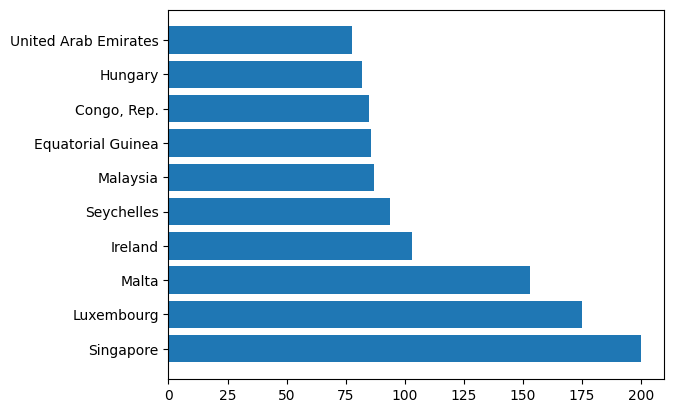

In [11]:
plt.barh(y = Country_exports.country , width = Country_exports.exports)

    -- INFERENCE --
    
        1. Singapore ranks highest with exports at 200.0% of its GDP per capita, indicating a substantial export-driven 
           economy.
           
        2. Luxembourg follows closely with exports at 175.0% of its GDP per capita, reflecting its strong economic reliance
           on exports.

        3. The next countries in the ranking, such as Malta (153.0%), Ireland (103.0%), and Seychelles (93.8%), also have
           exports that surpass their GDP per capita, suggesting export-oriented economic structures.

        4. Notably, Equatorial Guinea (85.8%), Congo, Rep. (85.1%), Malaysia (86.9%), and Hungary (81.8%) have export 
           percentages close to their GDP per capita, indicating a significant export presence but with varying degrees of
           reliance on it.

        5. The United Arab Emirates (77.7%) and Maldives (77.6%) maintain substantial export ratios relative to their GDP
           per capita, underlining their export-focused economies.

        6. Belgium (76.4%), Slovak Republic (76.3%), Turkmenistan (76.3%), and Estonia (75.1%) display similar export 
           levels, emphasizing the importance of exports in their economic landscapes.

        7. Vietnam (72.0%) and the Netherlands (72.0%) share the same export percentage, indicating an essential role for 
           exports in their economies.

        8. Panama (70.0%), Bahrain (69.5%), and Brunei (67.4%) round out the top 20, each with a significant export
           component relative to their GDP per capita.
           
        9. These findings highlight the importance of international trade and exports in shaping the economic landscape of 
           these nations. Additionally, countries like Equatorial Guinea and Malaysia, with export percentages close to 
           their GDP per capita, demonstrate significant export activities but with differences in their economic 
           structures.    

##### COUNTRY WISE HEALTH EXPENDITURE 

In [12]:
Country_health = df.groupby('country')['health'].mean().reset_index().sort_values('health',ascending = False).head(10)
Country_health

,country,health
159,United States,17.9
101,"Micronesia, Fed. Sts.",14.2
132,Sierra Leone,13.1
110,Netherlands,11.9
54,France,11.9
88,Liberia,11.8
102,Moldova,11.7
58,Germany,11.6
26,Burundi,11.6
145,Switzerland,11.5


<BarContainer object of 10 artists>

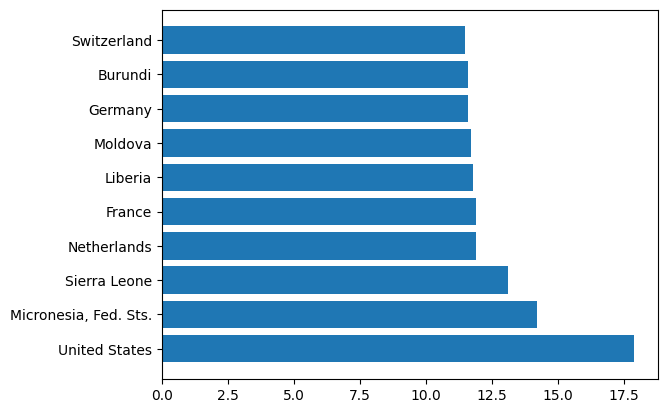

In [13]:
plt.barh(y = Country_health.country , width = Country_health.health)

    -- INFERENCE -- 
    
    * The United States allocates the highest percentage of its GDP per capita (17.9%) to health spending among the top 20 
      countries, indicating a significant investment in health care.

    * Micronesia, Fed. Sts., with a health spending percentage of 14.2%, follows the United States closely, suggesting a 
      substantial commitment to health care in this nation as well.

    * Sierra Leone, allocating 13.1% of its GDP per capita to health, ranks third in health spending among the top 20 
      countries. This suggests a considerable effort to address health care needs in Sierra Leone.

    * France and the Netherlands share the fourth position with a health spending percentage of 11.9%. This indicates a 
      similar level of investment in health care as a proportion of GDP per capita.

##### COUNTRY WISE ANALYSIS OF IMPORTS 

In [14]:
Country_imports = df.groupby('country')['imports'].mean().reset_index().sort_values('imports',ascending = False).head(10)
Country_imports

,country,imports
133,Singapore,174.0
98,Malta,154.0
91,Luxembourg,142.0
131,Seychelles,108.0
87,Lesotho,101.0
88,Liberia,92.6
73,Ireland,86.5
83,Kyrgyz Republic,81.7
136,Solomon Islands,81.2
101,"Micronesia, Fed. Sts.",81.0


<BarContainer object of 10 artists>

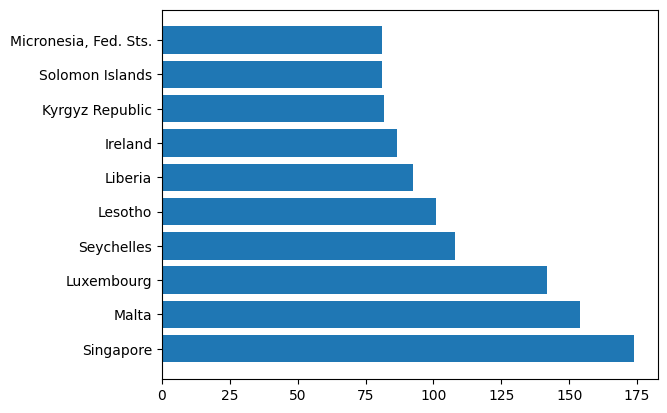

In [15]:
plt.barh(y = Country_imports.country , width = Country_imports.imports)

    -- INFERENCE --
    
        1. Singapore, with imports per capita at 174.0% of GDP per capita, has the highest import rate among the top 20 
           countries. Singapore's robust economy and strategic location as a global trading hub contribute to its high 
           imports relative to its GDP per capita.
           
        2. Malta and Luxembourg also feature prominently in the list, with import percentages of 154.0% and 142.0% of GDP 
           per capita, respectively. Both Malta and Luxembourg are known for their strong financial sectors and open 
           economies, which attract international trade and investments.

        3. Notably, countries like Lesotho and Liberia have relatively high import percentages compared to their GDP per 
           capita, standing at 101.0% and 92.6%, respectively. These countries may heavily rely on imports for essential 
           goods and services due to limited domestic production capacities.

##### COUNTRY WISE ANALYSIS OF  INCOME

In [16]:
Country_income = df.groupby('country')['income'].mean().reset_index().sort_values(by = 'income',ascending = False).head(20)
Country_income

,country,income
123,Qatar,125000.0
91,Luxembourg,91700.0
23,Brunei,80600.0
82,Kuwait,75200.0
133,Singapore,72100.0
114,Norway,62300.0
157,United Arab Emirates,57600.0
145,Switzerland,55500.0
159,United States,49400.0
73,Ireland,45700.0


<BarContainer object of 20 artists>

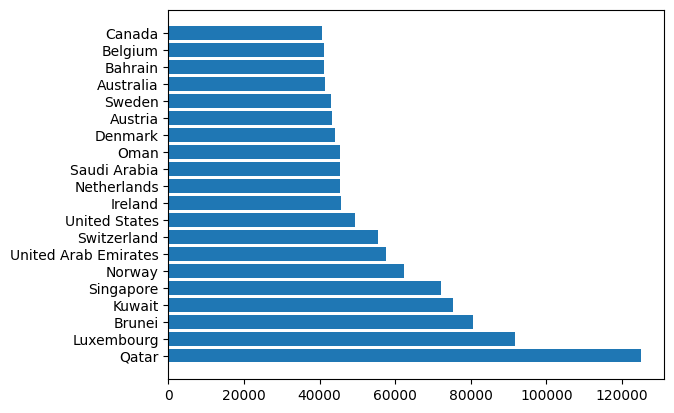

In [17]:
plt.barh(y = Country_income.country , width = Country_income.income)

    -- INFERENCE --
    
        1. The top 20 countries with the highest average income per person have varying income levels, with Qatar having the
           highest income at 125,000.0, and Canada having the lowest among these countries at 40,700
           
           Qatar's exceptionally high average income compared to the other countries suggests a unique economic landscape, 
           possibly driven by factors like oil wealth, investment, or economic policies.

        2. A significant income gap exists between Qatar, the highest-income country, and the rest of the top 20 countries,
           which have considerably lower average incomes.

        3. Luxembourg, Brunei, Kuwait, and Singapore follow Qatar in terms of income, each with incomes exceeding 70,000
        
           The presence of countries like Luxembourg, Brunei, Kuwait, and Singapore in the top income bracket indicates 
           that factors such as financial services, natural resources, and strategic geographical location can contribute 
           to high average incomes.

        4. The mean income of these top 20 countries shows a notable range, with several countries clustered around the 
           40,000.0 to 50,000.0 range.
           
           The clustering of several countries around the 40,000.0 to 50,000.0 income range suggests a commonality among
           them, potentially related to economic stability, industrialization, or access to global markets.

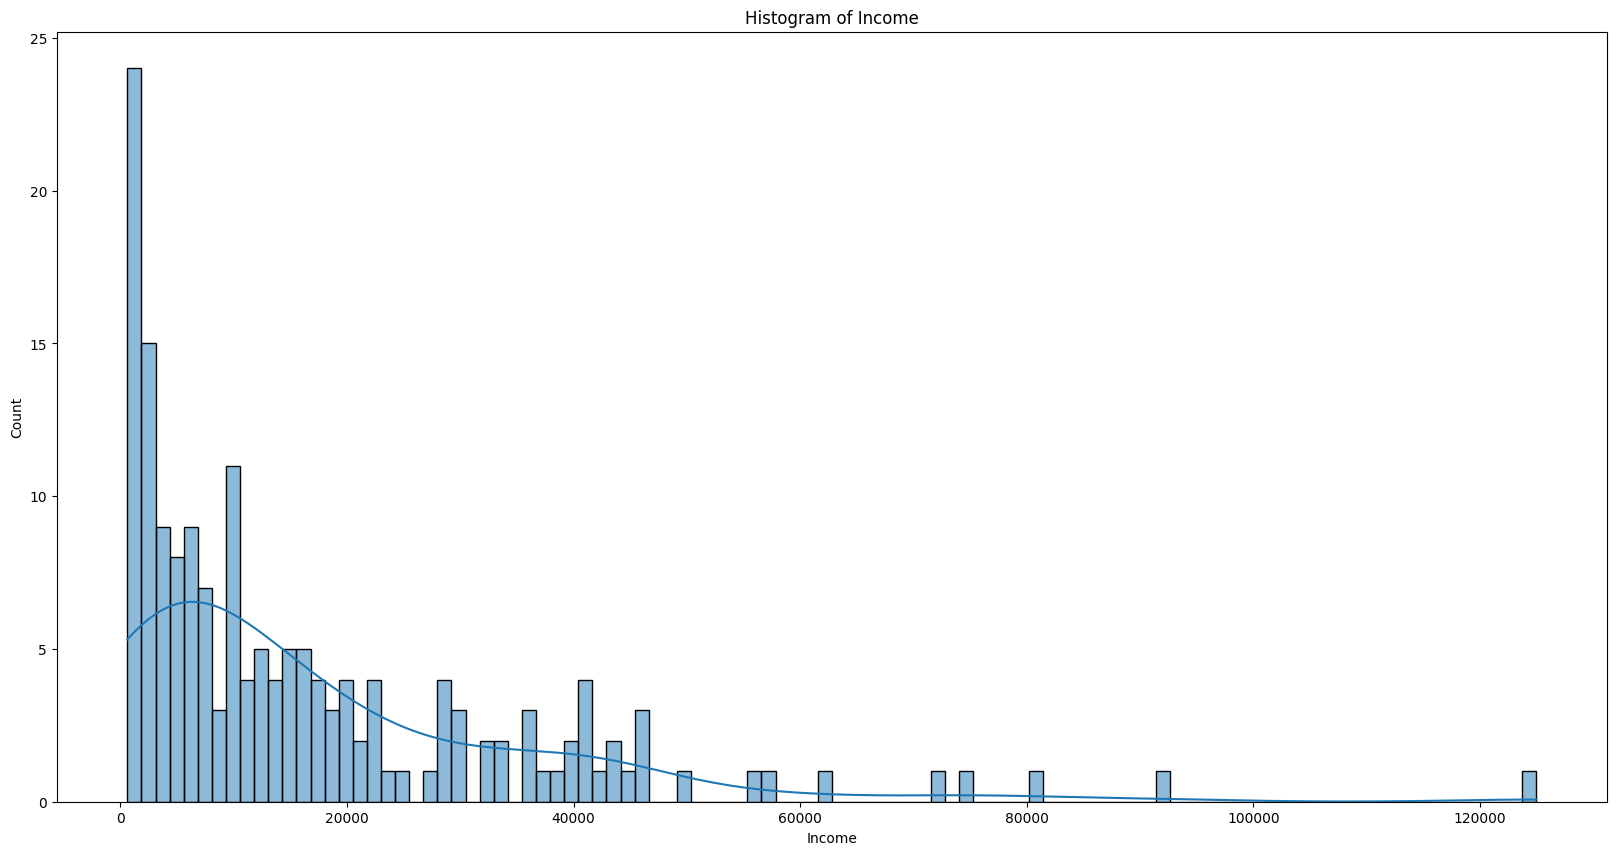

In [18]:
plt.figure(figsize = (20,10))
sns.histplot(df.income, bins = 100 , kde = True )
plt.title("Histogram of Income")
plt.xlabel("Income")
plt.show()

In [19]:
df.income.std()

19278.06769765767

#### The most common income level is $ 0 to $ 20,000 per capita
The standard deviation of approximately $19,278 signifies a wide variability in income among these countries.
       
       A higher standard deviation indicates that the income values are spread out over a broad range, highlighting 
       economic disparities among the countries.

##### COUNTRY WISE IMPORT AND EXPORT ANALYSIS 

In [20]:
df.groupby('country')[['imports','exports']].mean().sort_values('exports',ascending = False).head(20)

,imports,exports
country,,
Singapore,174.0,200.0
Luxembourg,142.0,175.0
Malta,154.0,153.0
Ireland,86.5,103.0
Seychelles,108.0,93.8
Malaysia,71.0,86.9
Equatorial Guinea,58.9,85.8
"Congo, Rep.",54.7,85.1
Hungary,76.5,81.8


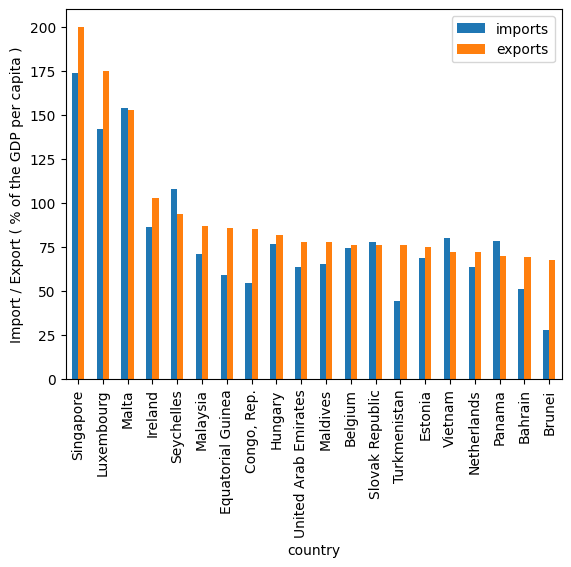

In [21]:
df.groupby('country')[['imports','exports']].mean().sort_values('exports',ascending = False).head(20).plot(kind = 'bar')
plt.ylabel ( 'Import / Export ( % of the GDP per capita )' )
plt.show()

#### Finding top 10 countries whoose import is more than the export

In [22]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


<Axes: xlabel='country'>

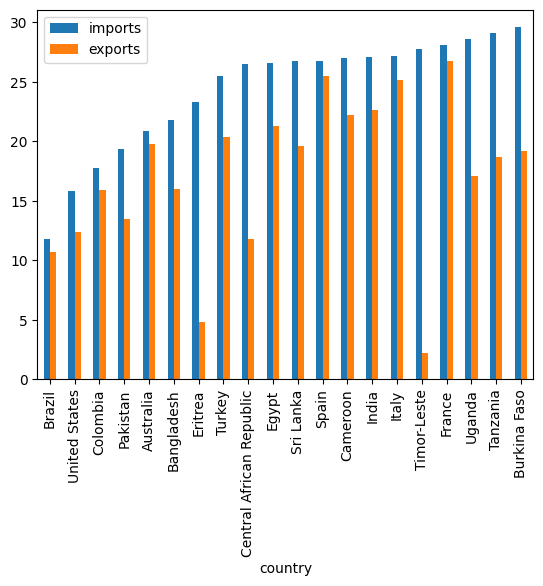

In [23]:
# Calculate the trade balance (import - export) for each country
idx = df['imports'] - df['exports']
df.iloc[idx[idx>0].index].sort_values('imports')[['imports','exports','country']].set_index('country').head(20).plot(kind = 'bar')

In [24]:
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [25]:
new_df = df.copy()

In [26]:
new_df.drop('country',axis = 1,inplace=True)

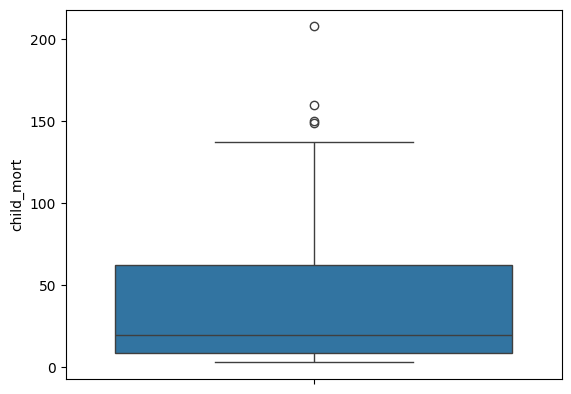

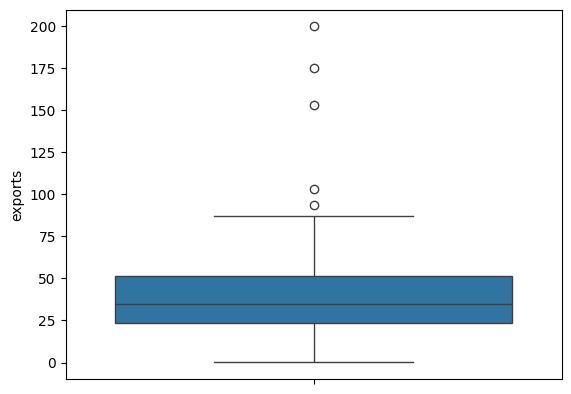

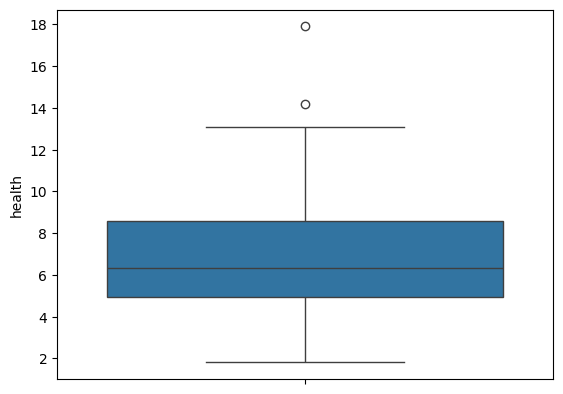

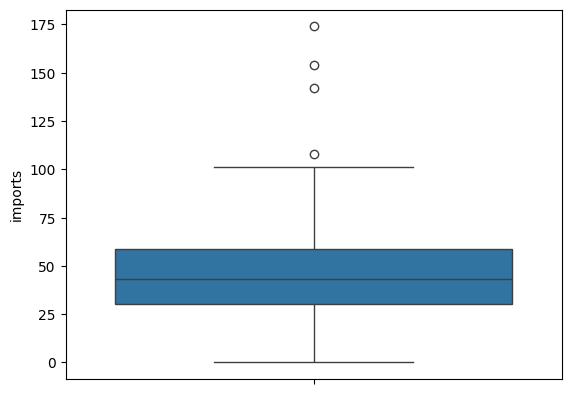

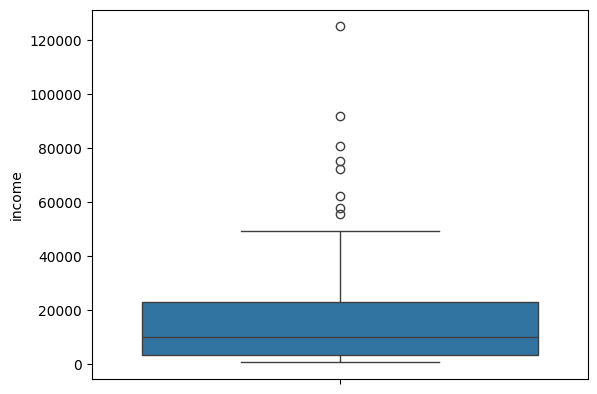

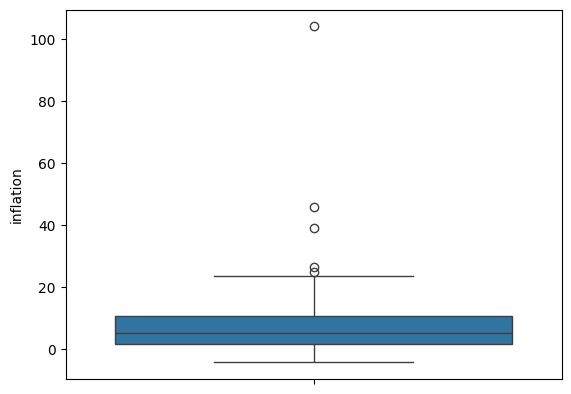

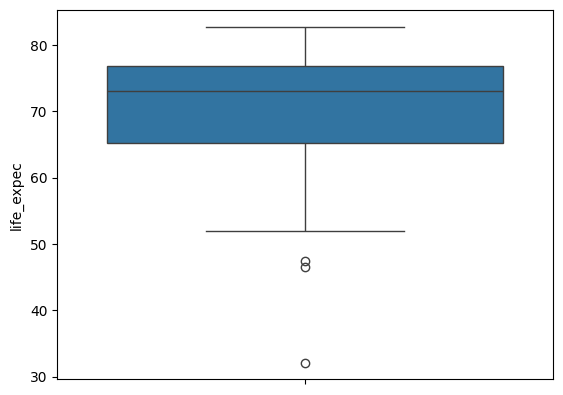

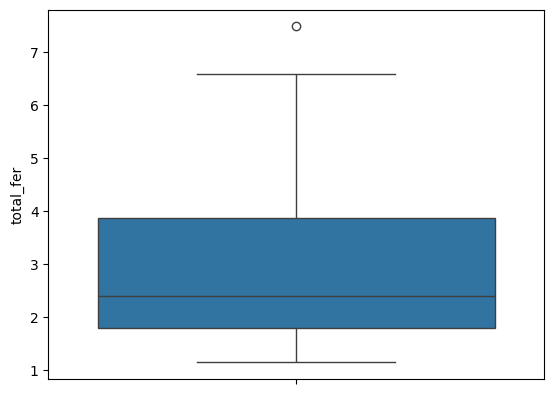

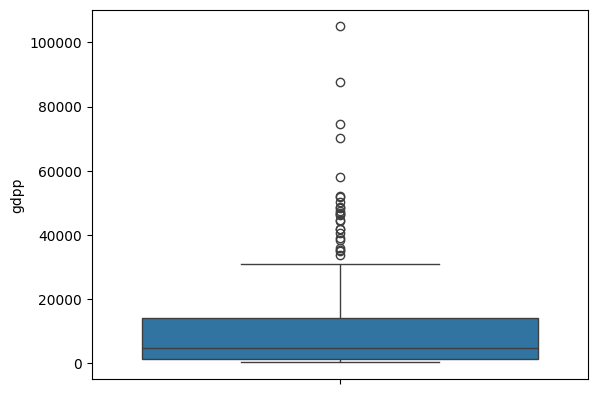

In [27]:
for i in new_df.columns:
    sns.boxplot(df[i])
    plt.show()

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(new_df)
new_df_scaled = pd.DataFrame(standardized_data,columns = new_df.columns)
new_df_scaled.head(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


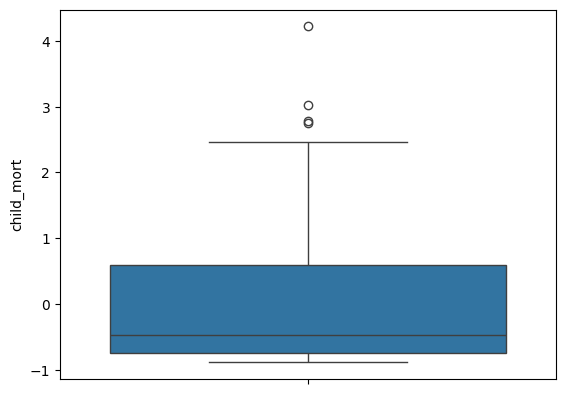

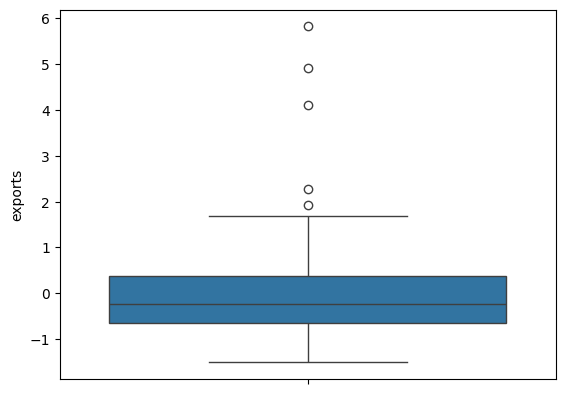

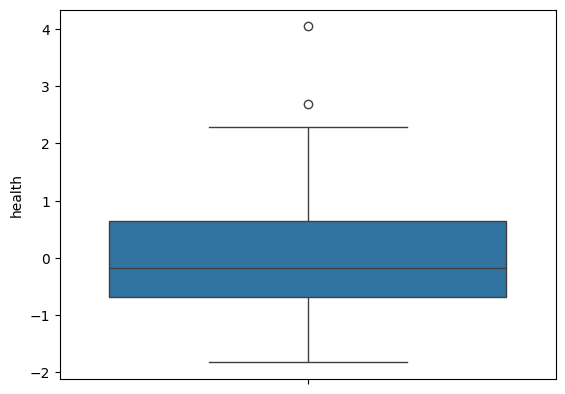

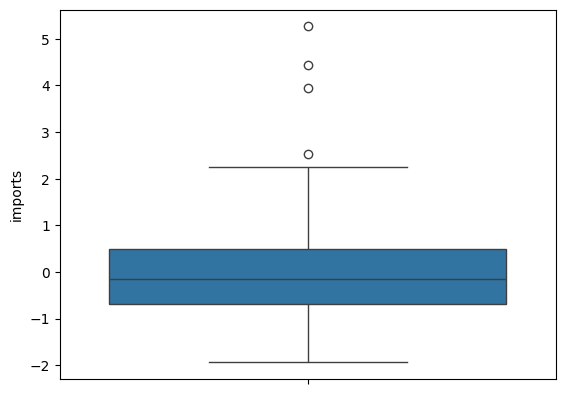

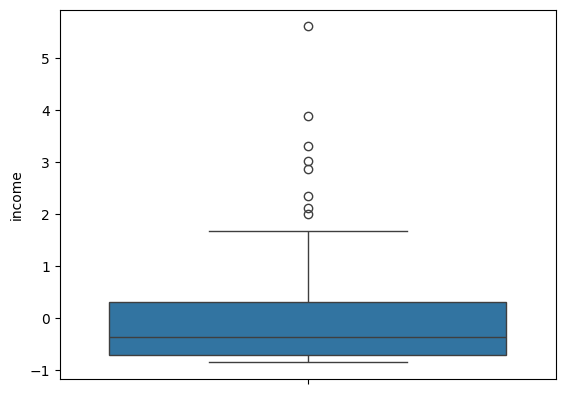

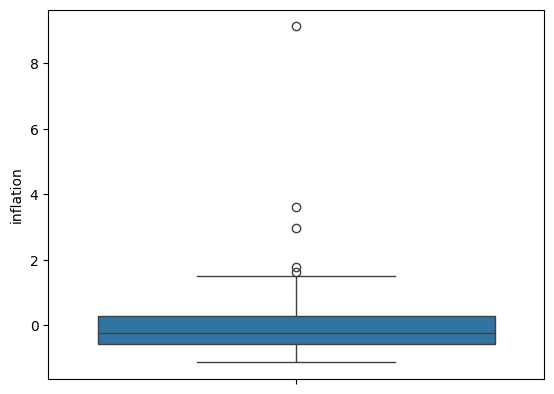

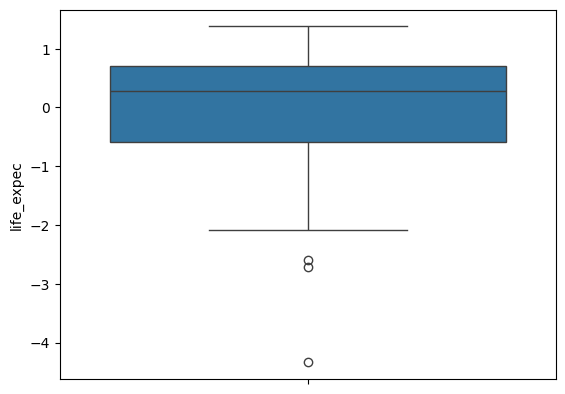

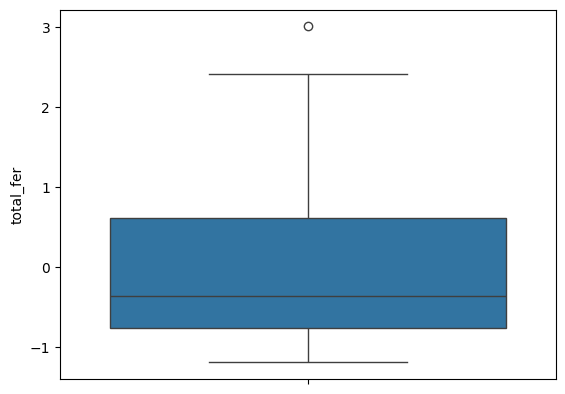

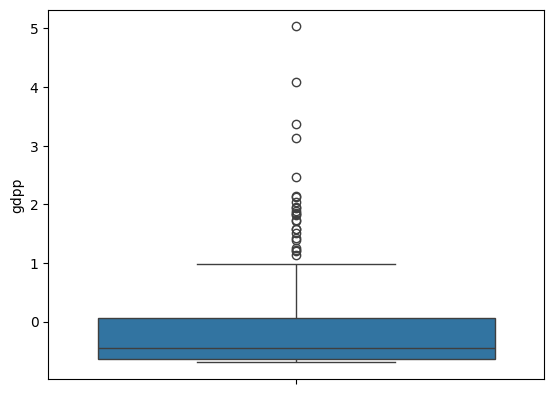

In [33]:
for i in new_df_scaled.columns:
    sns.boxplot(new_df_scaled[i])
    plt.show()

## PREDICTIVE MODELING

### K MEANS 

#### ELBOW METHOD 

    Understanding Inertia (Within-Cluster Sum of Squares):

       * Inertia, also known as the within-cluster sum of squares, measures the total distance between data points and 
         their assigned cluster centers.
         
       * Inertia quantifies how far the data points within a cluster are from the center of that cluster. Low inertia 
         indicates that points in the same cluster are close to each other, while high inertia suggests that points are 
         spread out.
         
       * The goal of K-Means is to minimize inertia by finding the optimal cluster centers.
       
    Variance Explained by Clusters:
        
        * As the number of clusters increases, the inertia typically decreases because the data points can be fitted more 
          closely to the cluster centers.
          
        * However, it's essential to balance the reduction in inertia with the simplicity of interpretation. Too many 
          clusters may lead to over-fitting and loss of meaningful patterns.   
          
    Finding the Elbow Point:

        * The Elbow Method suggests that the k values (number of clusters) are supposed to be on the x-axis and the 
          corresponding inertia values on the y-axis.
          
        * As k increases, the inertia generally decreases, leading to a gradual decline in the inertia curve. However,
          at a certain point, adding more clusters doesn't provide a significant reduction in inertia.
          
        * The "elbow point" on the plot is the point where the inertia curve starts to bend or form an "elbow-like" shape.     
    Interpreting the Elbow Point:

        * The intuition behind the Elbow Method is that the elbow point represents a trade-off between model complexity 
          (number of clusters) and the goodness of fit (inertia).
          
        * The point at which the inertia curve starts to bend suggests that adding more clusters beyond this point does not 
          significantly improve the clustering quality. Instead, it introduces unnecessary complexity.
          
        * Therefore, the elbow point is considered a reasonable estimate for the optimal number of clusters because it 
          strikes a balance between explaining variance and avoiding excessive complexity.

!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl

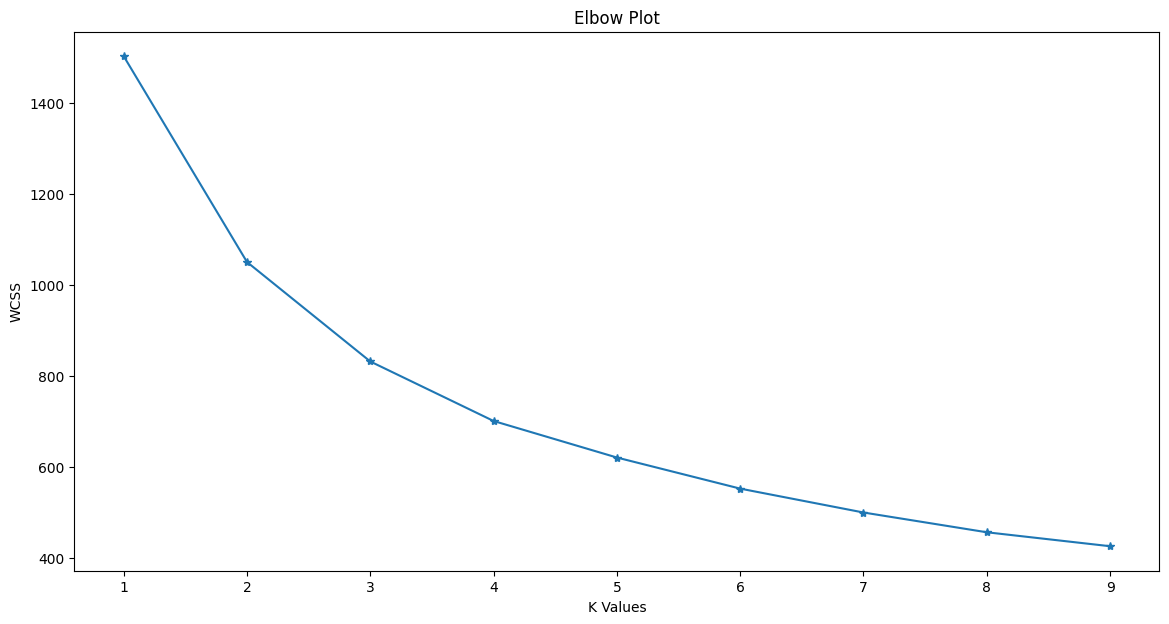

In [60]:
WCSS = [  ]

for i in range(1,10):
    k = KMeans(n_clusters = i)
    k.fit(new_df_scaled)
    WCSS.append(k.inertia_)

plt.figure(figsize = (14,7))
plt.plot(range(1,10), WCSS, marker = '*')
plt.title('Elbow Plot')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

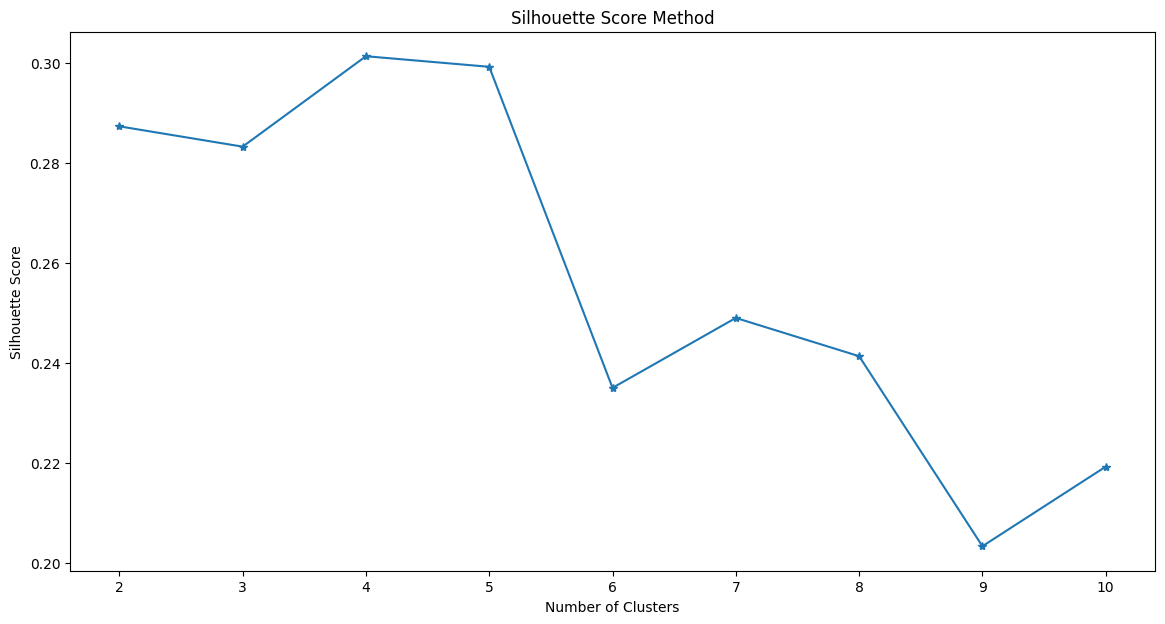

In [61]:
silhouette_scores = [ ]

for k in range ( 2 , 11 ) :

    kmeans = KMeans(n_clusters = k , random_state = 42 )

    labels = kmeans.fit_predict(new_df_scaled)

    silhouette_avg = silhouette_score(new_df_scaled , labels , metric = 'euclidean')

    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (14 ,7))

plt.plot(range(2 , 11), silhouette_scores, marker = '*' )

plt.xlabel('Number of Clusters')

plt.ylabel('Silhouette Score')

plt.title('Silhouette Score Method')

plt.show( )

### Now will perform Normalization of the data

In [62]:
new_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [63]:
norm = Normalizer()
norm_df = norm.fit_transform(new_df)
norm_df = pd.DataFrame(norm_df , columns = new_df.columns)
norm_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296
...,...,...,...,...,...,...,...,...,...
162,0.006974,0.011129,0.001254,0.012586,0.704517,0.000626,0.015046,0.000836,0.709293
163,0.000802,0.001337,0.000230,0.000826,0.773949,0.002153,0.003537,0.000116,0.633231
164,0.004980,0.015388,0.001462,0.017140,0.959588,0.002586,0.015623,0.000417,0.279969
165,0.012059,0.006426,0.001110,0.007368,0.959578,0.005055,0.014458,0.001000,0.280591


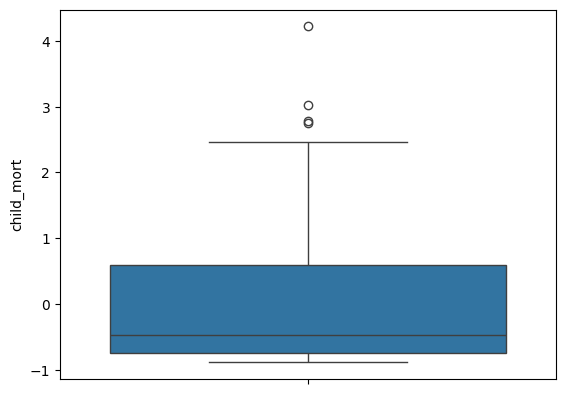

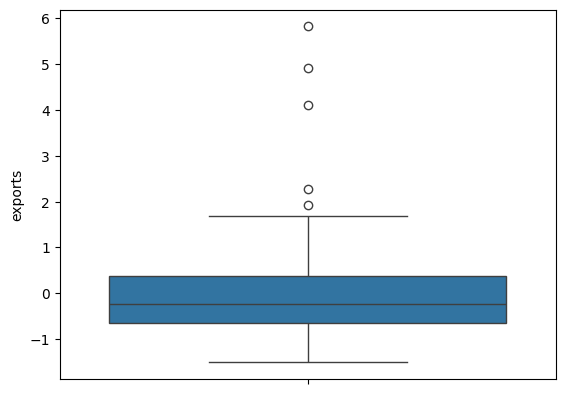

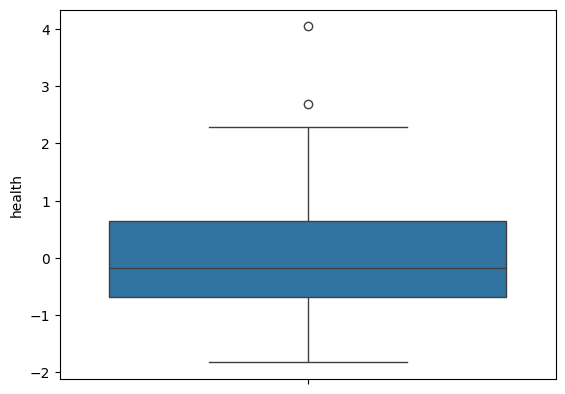

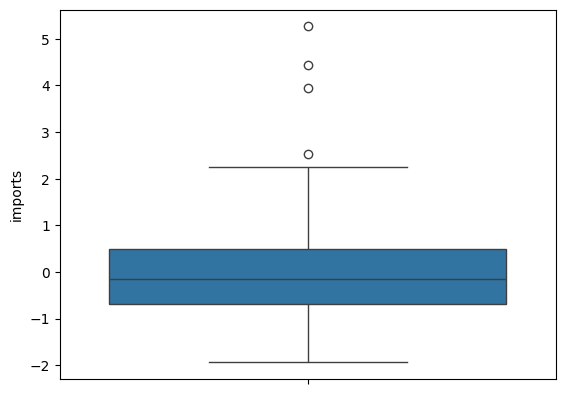

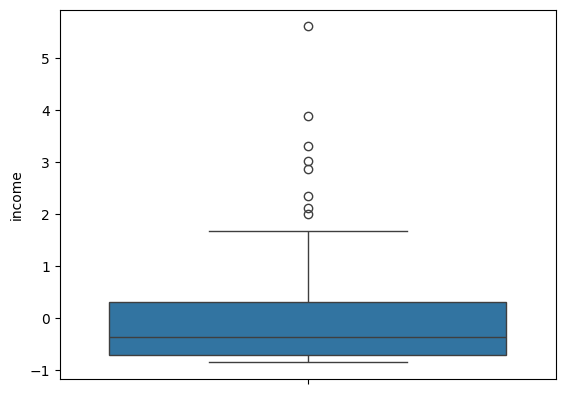

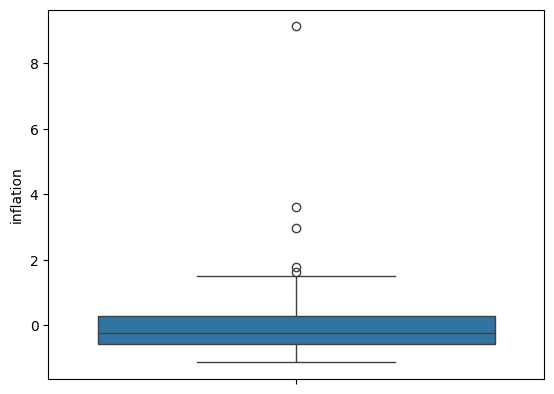

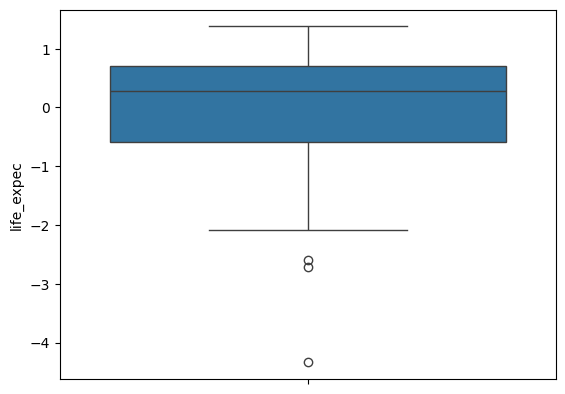

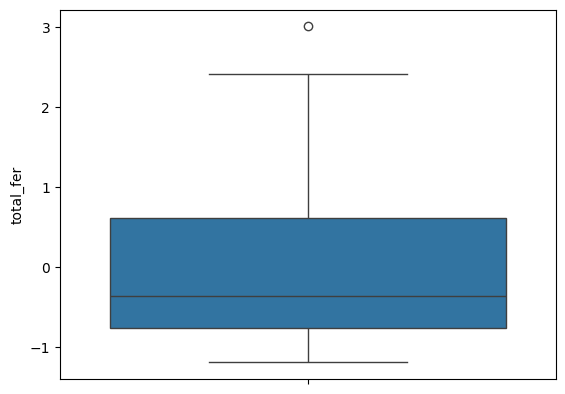

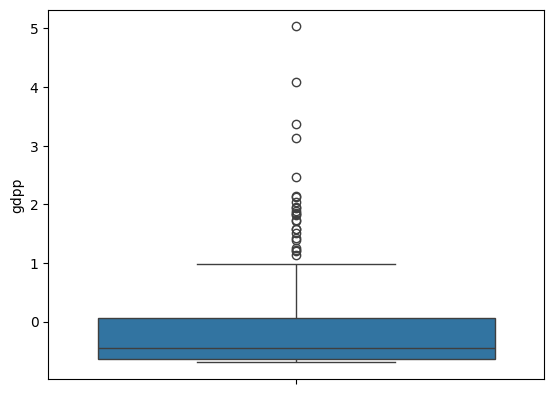

In [64]:
for i in new_df_scaled.columns:
    sns.boxplot(new_df_scaled[i])
    plt.show()

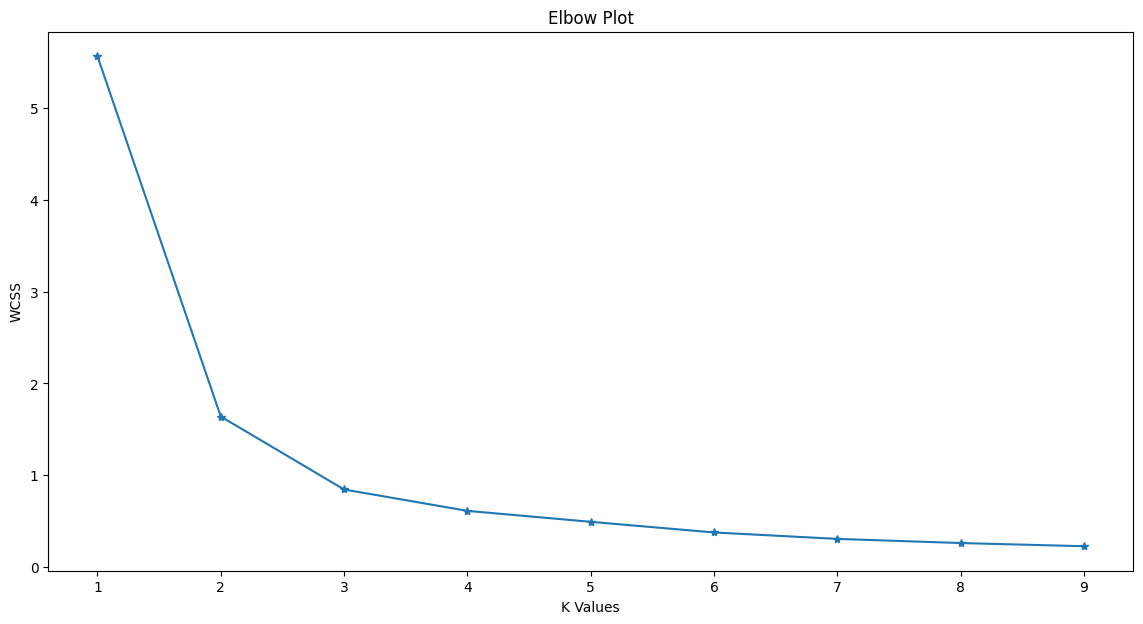

In [65]:
WCSS = [  ]

for i in range(1,10):
    k = KMeans(n_clusters = i)
    k.fit(norm_df)
    WCSS.append(k.inertia_)

plt.figure(figsize = (14,7))
plt.plot(range(1,10), WCSS, marker = '*')
plt.title('Elbow Plot')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

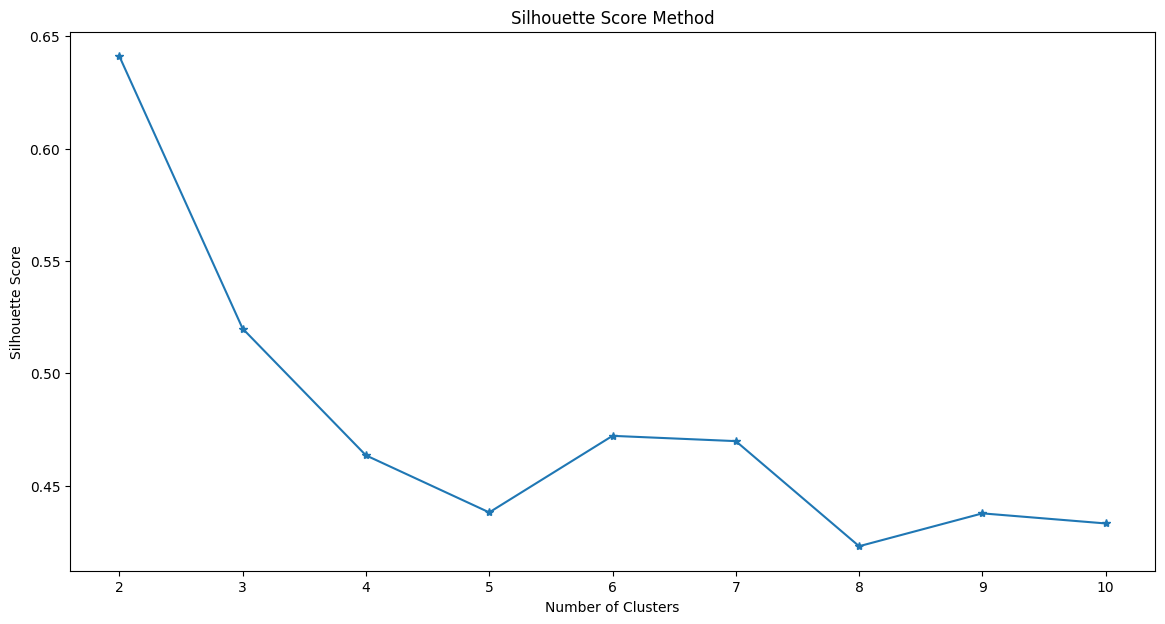

In [66]:
silhouette_scores = [ ]

for k in range(2 ,11) :

    kmeans = KMeans(n_clusters = k , random_state = 42 )

    labels = kmeans.fit_predict(norm_df)

    silhouette_avg = silhouette_score(norm_df , labels , metric = 'euclidean')

    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (14 ,7))

plt.plot(range(2 , 11), silhouette_scores, marker = '*' )

plt.xlabel('Number of Clusters')

plt.ylabel('Silhouette Score')

plt.title('Silhouette Score Method')

plt.show( )

### RobustScaler

In [67]:
from sklearn.preprocessing import RobustScaler

Robust = Normalizer()
roboust_df = Robust.fit_transform(new_df)

# Converting to ndarray to Dataframe
roboust_df=pd.DataFrame(roboust_df,columns = new_df.columns)
roboust_df.head()


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.052863,0.005861,0.004442,0.026314,0.943556,0.005532,0.032937,0.003411,0.324091
1,0.001546,0.002607,0.000610,0.004525,0.924602,0.000418,0.007104,0.000154,0.380828
2,0.002000,0.002813,0.000306,0.002300,0.945084,0.001180,0.005605,0.000212,0.326750
3,0.017304,0.009059,0.000414,0.006238,0.857916,0.003257,0.008739,0.000896,0.513295
4,0.000454,0.002008,0.000266,0.002599,0.842742,0.000064,0.003389,0.000094,0.538296


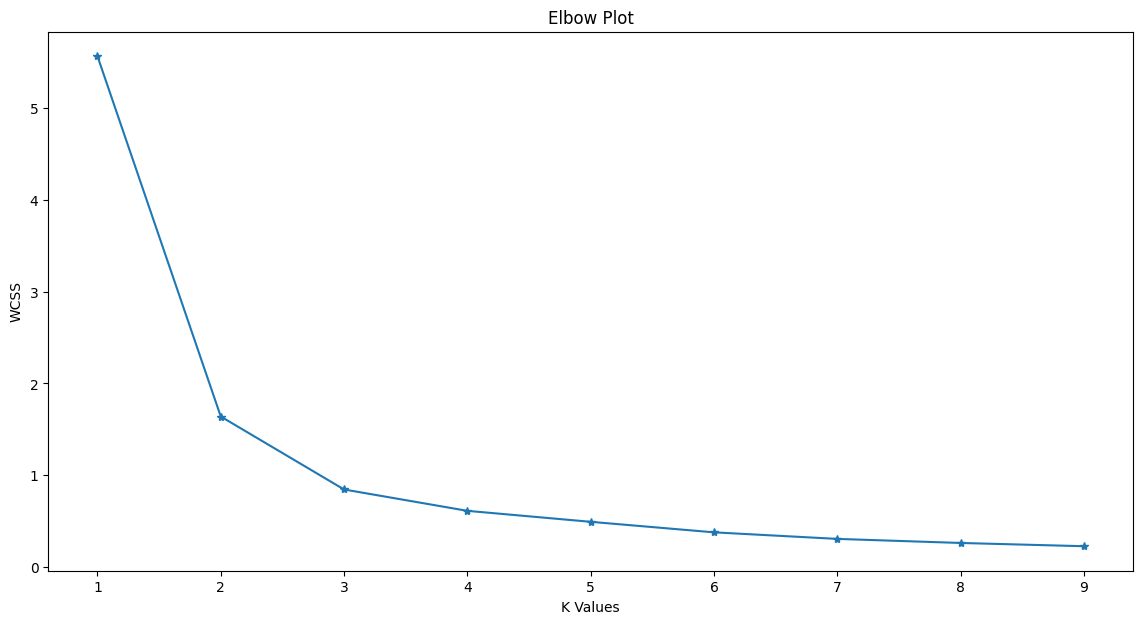

In [68]:
WCSS = [  ]

for i in range(1,10):
    k = KMeans(n_clusters = i)
    k.fit(roboust_df)
    WCSS.append(k.inertia_)

plt.figure(figsize = (14,7))
plt.plot(range(1,10), WCSS, marker = '*')
plt.title('Elbow Plot')
plt.xlabel('K Values')
plt.ylabel('WCSS')
plt.show()

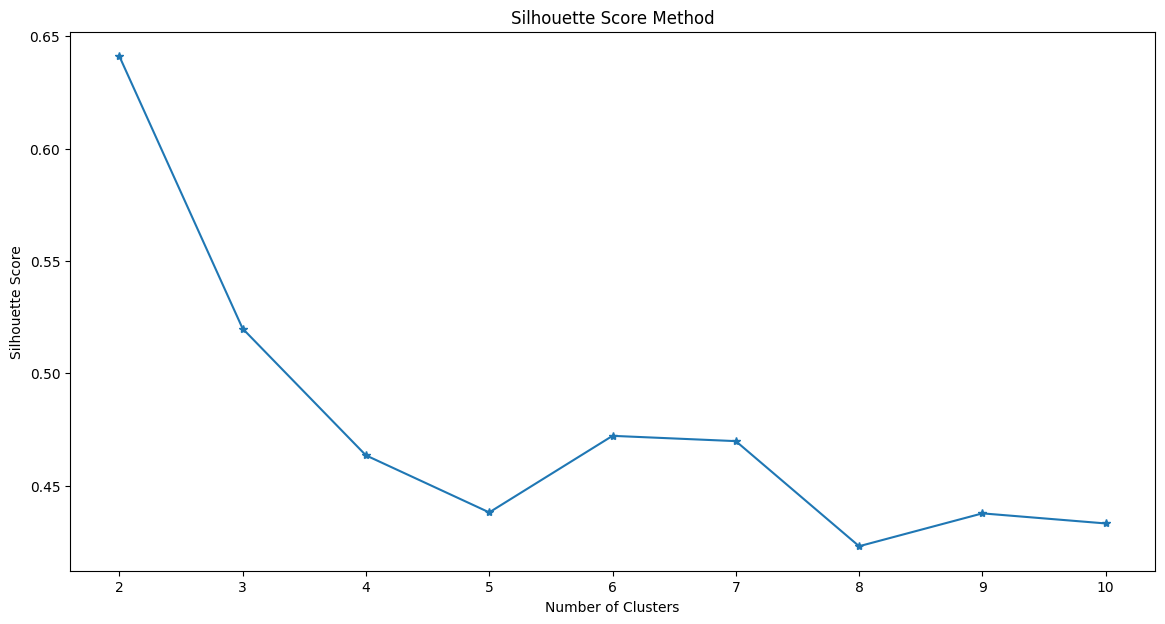

In [69]:
silhouette_scores = [ ]

for k in range(2 ,11) :

    kmeans = KMeans(n_clusters = k , random_state = 42 )

    labels = kmeans.fit_predict(norm_df)

    silhouette_avg = silhouette_score(roboust_df , labels , metric = 'euclidean')

    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (14 ,7))

plt.plot(range(2 , 11), silhouette_scores, marker = '*' )

plt.xlabel('Number of Clusters')

plt.ylabel('Silhouette Score')

plt.title('Silhouette Score Method')

plt.show( )

### CLUSTERS , K = 3

In [70]:
Clusters = KMeans(n_clusters = 3 , max_iter = 200 , random_state = 42)
Clusters.fit(norm_df)
Clusters.labels_

array([1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 0, 2,
       0, 2, 2, 1, 1, 2, 1, 2, 2, 0, 0, 2, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 2, 2, 0, 2, 2, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 1, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 1, 1])

In [71]:
df['Clusters_ID']=Clusters.labels_
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Clusters_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


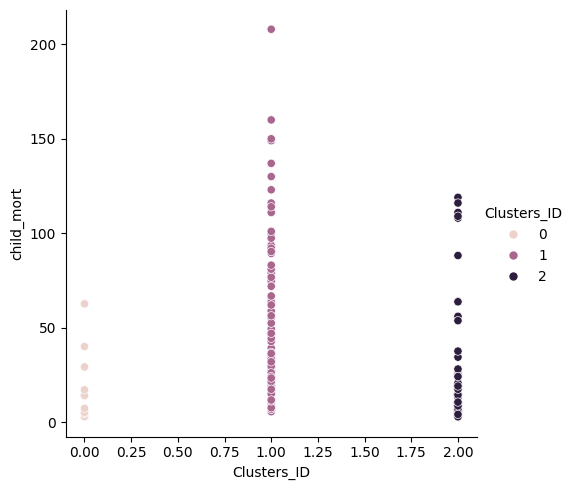

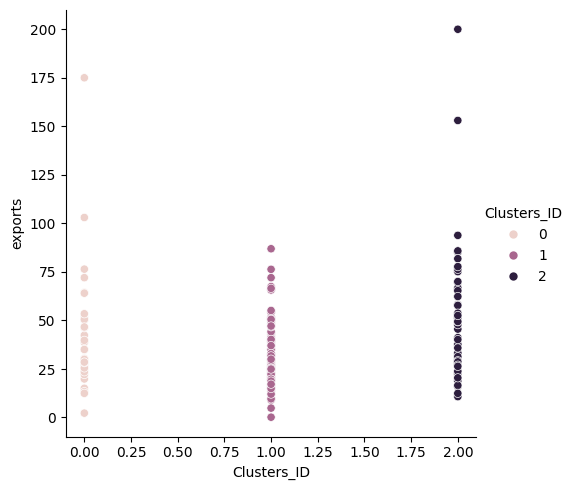

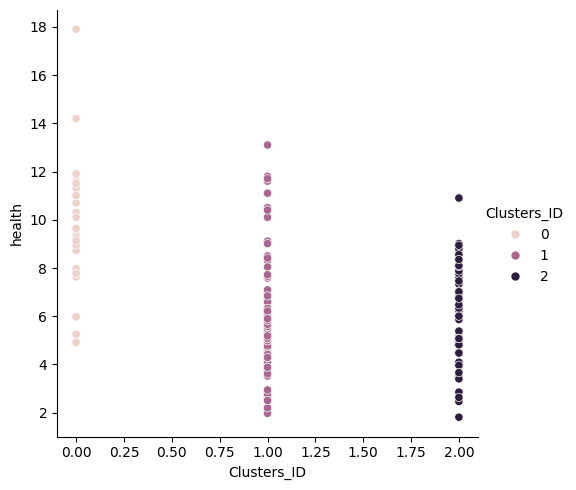

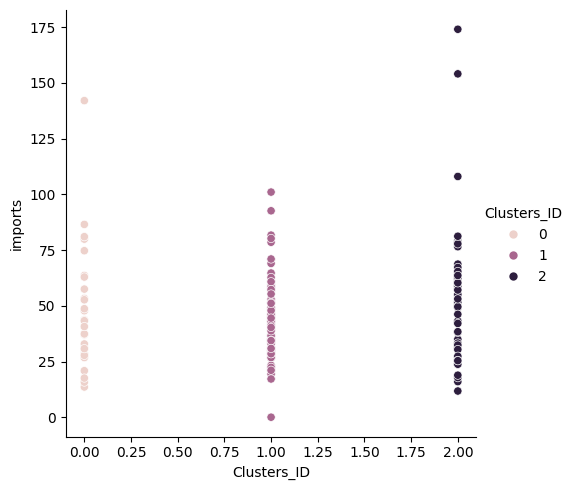

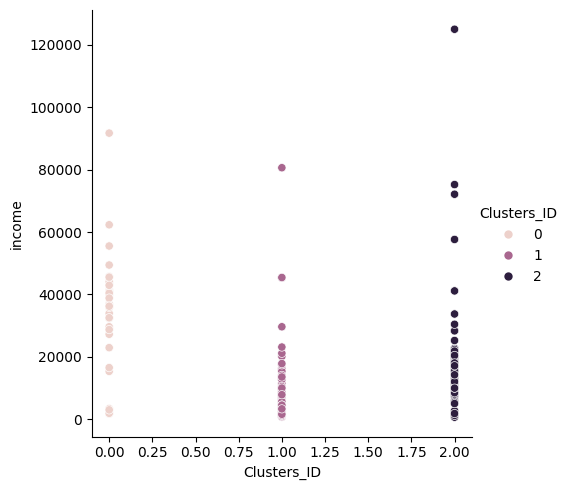

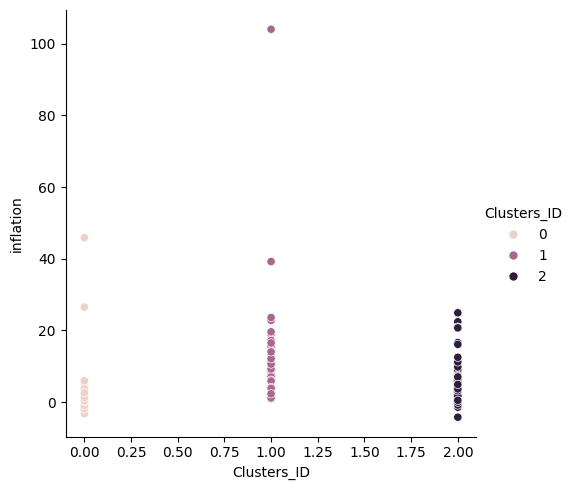

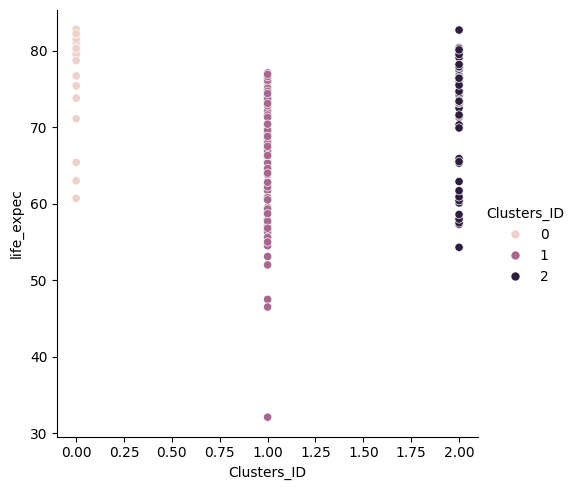

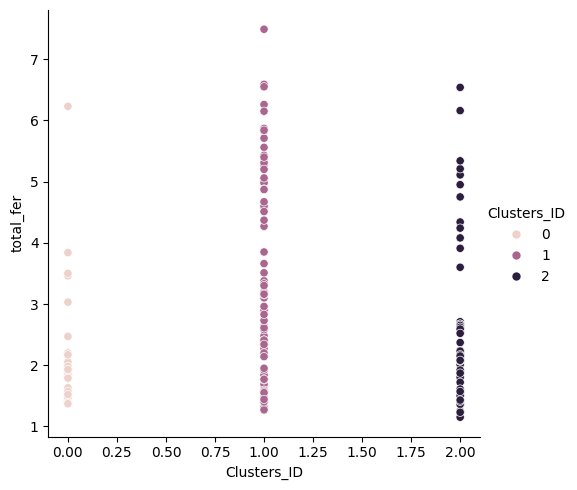

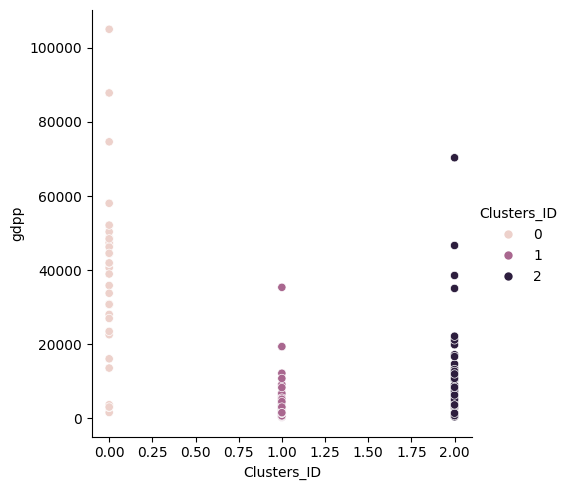

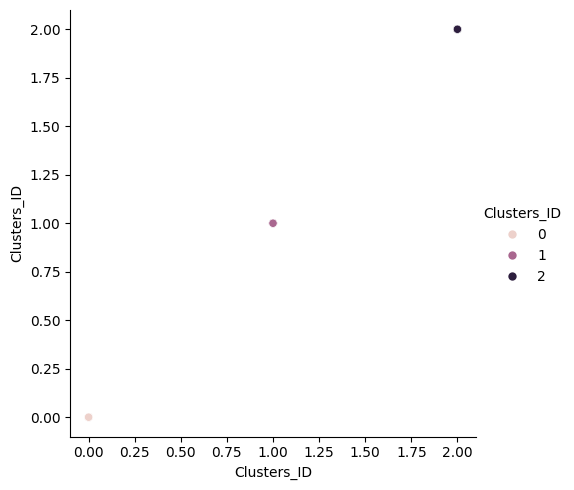

In [49]:
numeric_features=[x for x in df.columns if df[x].dtype!="object"]
#taking only the numeric columns from the dataframe.

for i in df[numeric_features].columns:
  sns.relplot(x='Clusters_ID',y=df[i],data=df,hue='Clusters_ID')


### AGGLOMERATIVE CLUSTERING

##### DENDOGRAM

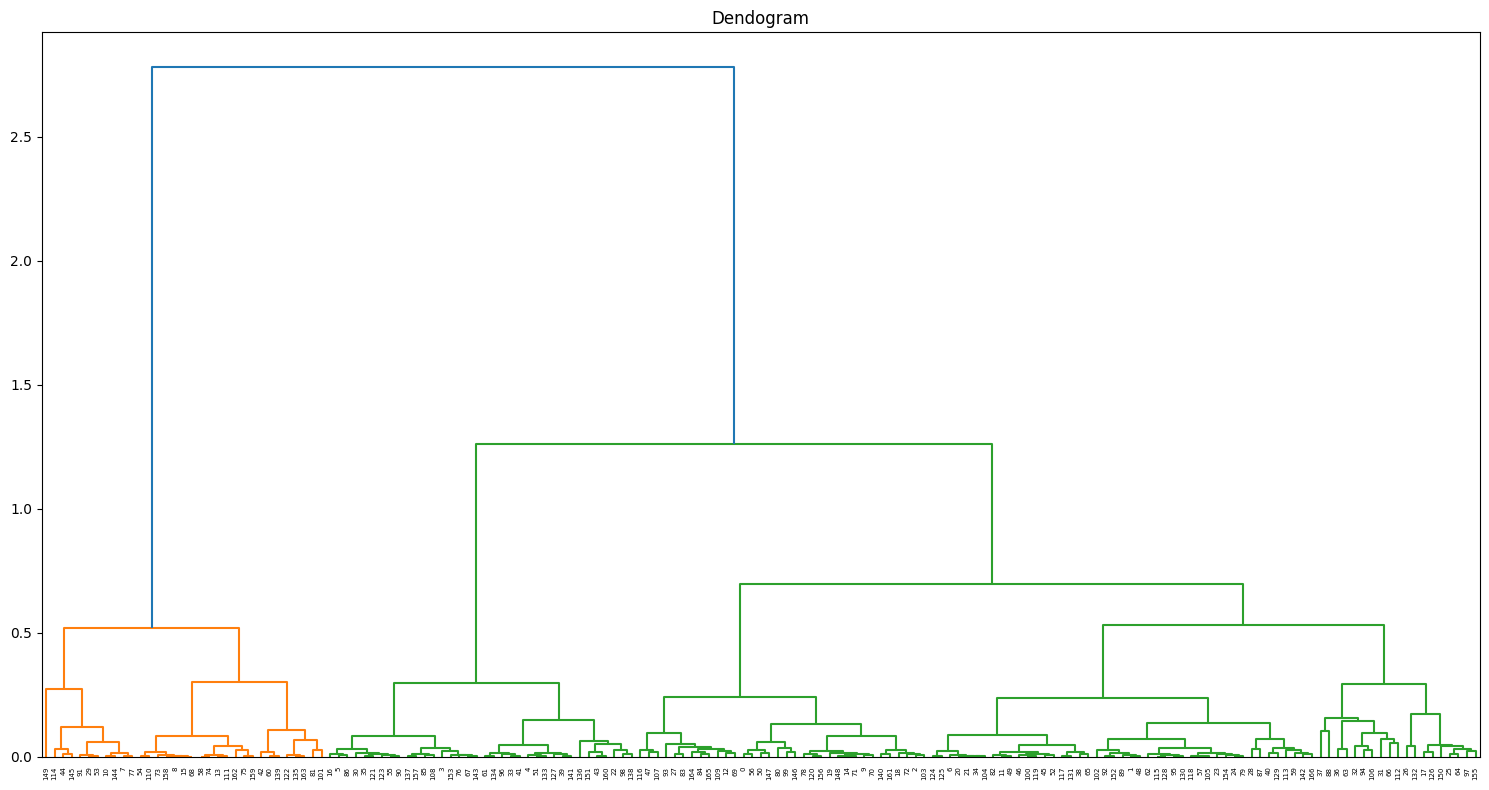

In [74]:
# Ward's method measures the distance between clusters as the increase in the sum of squared differences within the merged
# cluster.

# It aims to minimize the variance within clusters and often leads to well-balanced and compact clusters.

plt.figure ( figsize = ( 15 , 8 ) )

Linkage_Data = linkage(norm_df, method = 'ward' , metric = 'euclidean' )

dendrogram(Linkage_Data)

plt.title("Dendogram")

plt.tight_layout()

plt.show( )